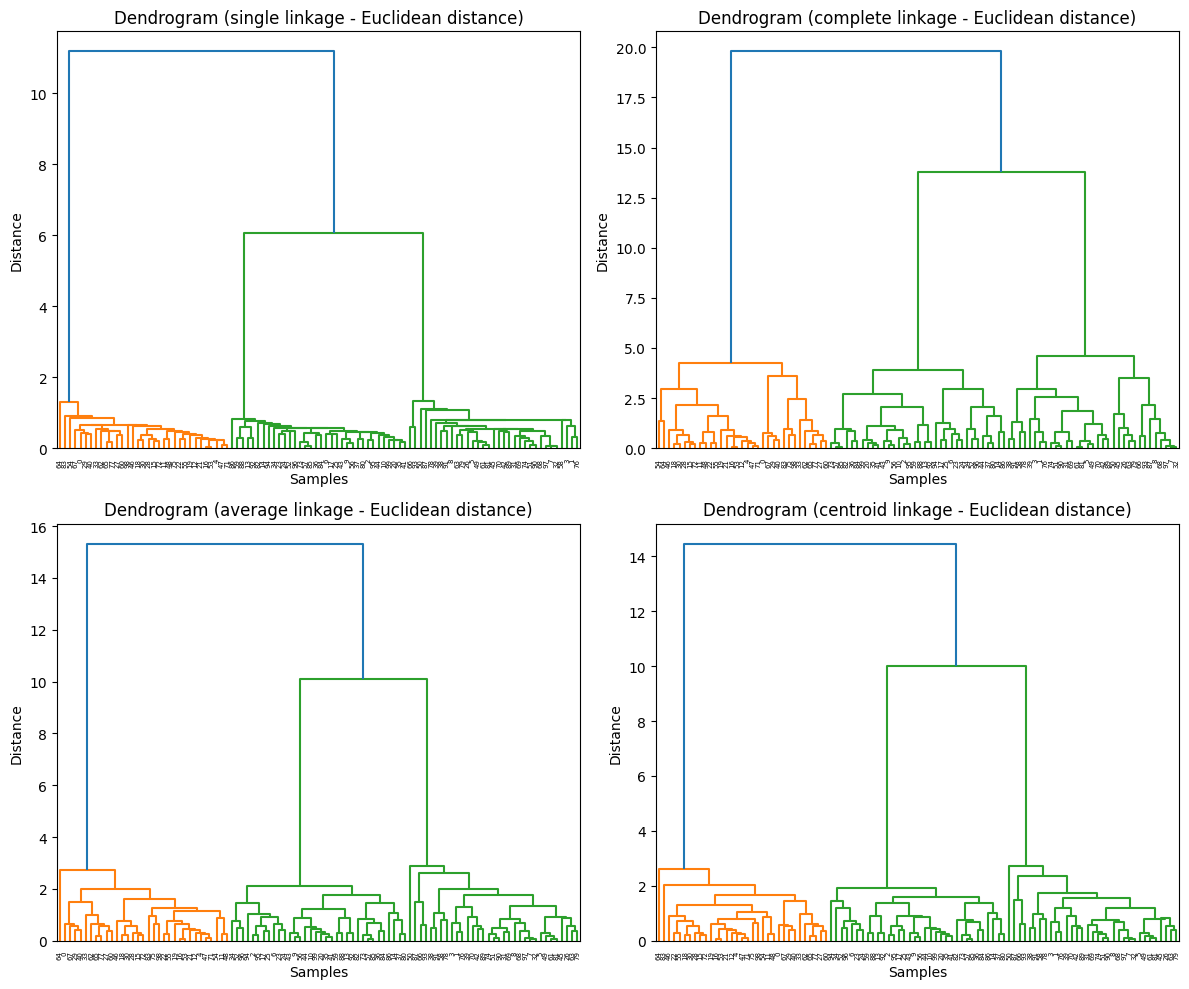

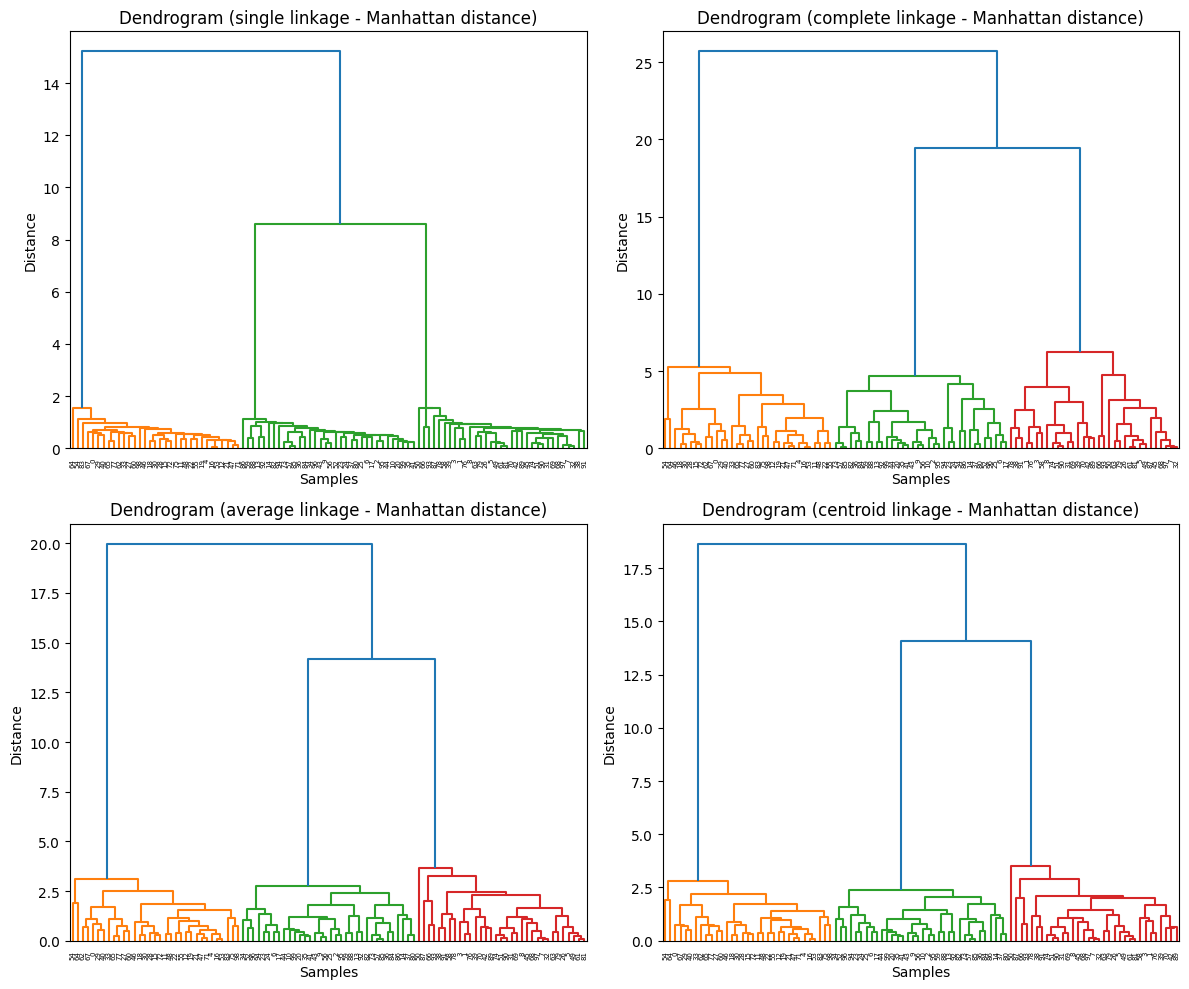

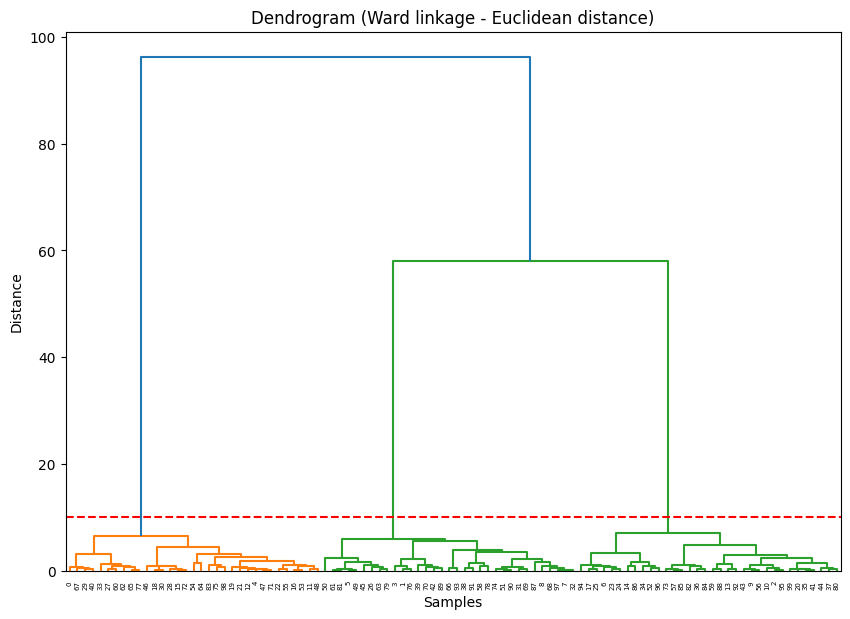

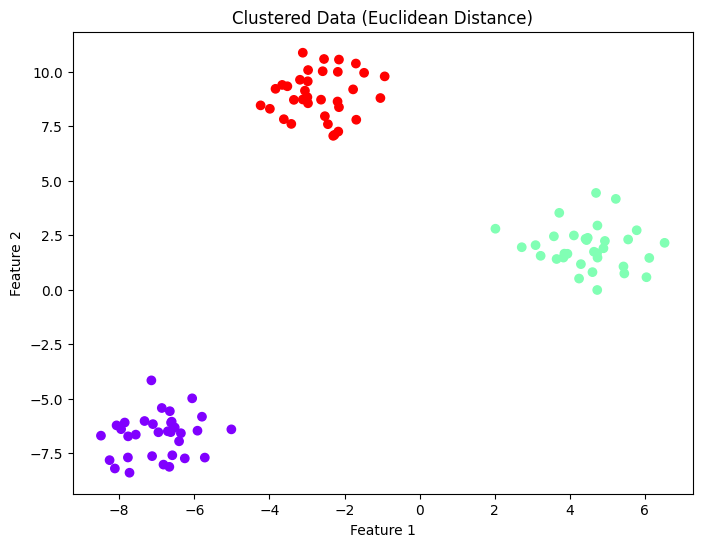

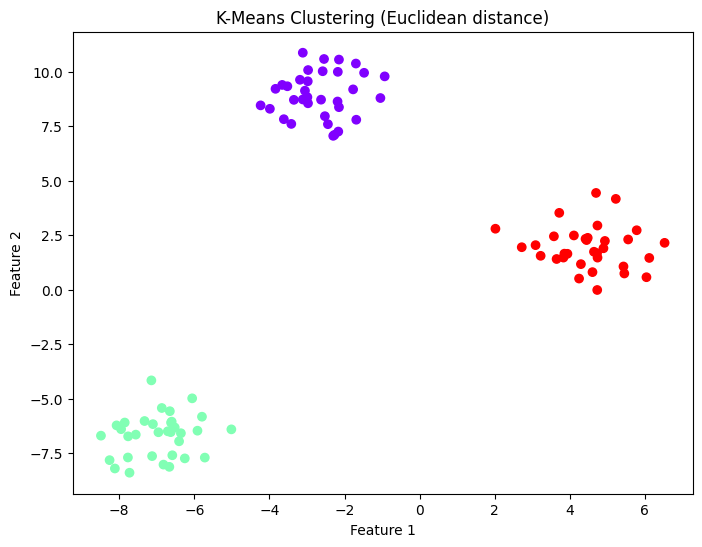

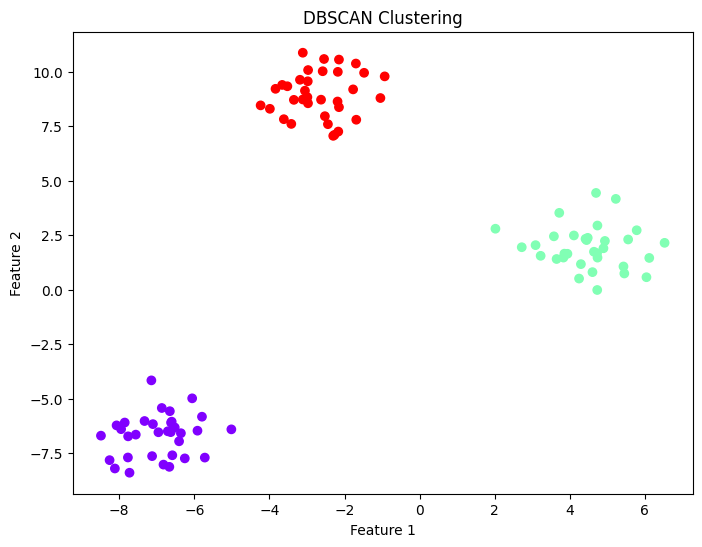

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist

# Step 1: Create a simple synthetic dataset (100 samples, 3 centers)
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Define linkage methods for hierarchical clustering
linkage_methods = ['single', 'complete', 'average', 'centroid']

# Task 1: Hierarchical clustering with Euclidean distance
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = sch.linkage(X, method=method, metric='euclidean')
    sch.dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage - Euclidean distance)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Task 2: Hierarchical clustering with Manhattan distance
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    dist_matrix = pdist(X, metric='cityblock')  # Manhattan distance
    Z = sch.linkage(dist_matrix, method=method)
    sch.dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage - Manhattan distance)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Task 3: Cut dendrogram to create clusters (for Euclidean distance)
cut_distance = 10  # Specify the cutting distance to form clusters
Z_euclidean = sch.linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
sch.dendrogram(Z_euclidean)
plt.title('Dendrogram (Ward linkage - Euclidean distance)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=cut_distance, color='r', linestyle='--')
plt.show()

# Cut the dendrogram at the specified distance
clusters_euclidean = sch.fcluster(Z_euclidean, cut_distance, criterion='distance')

# Plot clusters formed by cutting the dendrogram
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_euclidean, cmap='rainbow', marker='o')
plt.title('Clustered Data (Euclidean Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Task 4: K-Means Clustering (Euclidean distance)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Plot K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow', marker='o')
plt.title('K-Means Clustering (Euclidean distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Task 5: DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Plot DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='rainbow', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
